In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization


In [ ]:
# Define paths for the preprocessed dataset
processed_train_dir = '/content/drive/MyDrive/sports/sports_processed/train'
processed_test_dir = '/content/drive/MyDrive/sports/sports_processed/test'

# Image parameters
image_size = (240, 240)  # Resize images to 240x240
batch_size = 32
num_classes = 12  # Total number of sports categories

# Load the training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    processed_train_dir,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'  # Labels will be one-hot encoded
)

# Load the test dataset
test_dataset = tf.keras.utils.image_dataset_from_directory(
    processed_test_dir,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'  # Labels will be one-hot encoded
)

Found 4200 files belonging to 12 classes.
Found 1800 files belonging to 12 classes.


In [ ]:
# Load VGG19 model without the top layer (fully connected layers)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# Freeze the convolutional layers of VGG19
base_model.trainable = False

# Build the custom model
model_vgg19 = Sequential([
    base_model,  # VGG19 base model
       GlobalAveragePooling2D(),
    Dense(512, activation='relu'),  # First dense layer with 1024 units
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),  # Second dense layer with 512 units
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model_vgg19.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model_vgg19.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 7, 7, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │           3,084 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,424,524 (77.91 MB)

 Trainable params: 398,604 (1.52 MB)

 Non-trainable params: 20,025,920 (76.39 MB)

In [ ]:
# Train the VGG19-based model
history_vgg19 = model_vgg19.fit(
    train_dataset,
    epochs=40,
    validation_data=test_dataset
)


Epoch 1/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 62s 332ms/step - accuracy: 0.1301 - loss: 3.4874 - val_accuracy: 0.5494 - val_loss: 1.4646
Epoch 2/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 34s 259ms/step - accuracy: 0.3633 - loss: 2.1284 - val_accuracy: 0.6639 - val_loss: 1.0973
Epoch 3/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 40s 254ms/step - accuracy: 0.4699 - loss: 1.7312 - val_accuracy: 0.7189 - val_loss: 0.9453
Epoch 4/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 34s 257ms/step - accuracy: 0.5318 - loss: 1.4858 - val_accuracy: 0.7456 - val_loss: 0.8435
Epoch 5/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 41s 254ms/step - accuracy: 0.5931 - loss: 1.2551 - val_accuracy: 0.7628 - val_loss: 0.7859
Epoch 6/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 34s 257ms/step - accuracy: 0.6461 - loss: 1.1090 - val_accuracy: 0.7717 - val_loss: 0.7381
Epoch 7/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 34s 255ms/step - accuracy: 0.6649 - loss: 1.0111 - val_accuracy: 0.7789 - val_loss: 0.7071
Epoch 8/40
132/132 ━━━━━━━━━━━━━━━━━━━━ 34s 255ms/step - accuracy: 0.7085 - loss: 0

In [ ]:
# Evaluate the model on the test data
test_loss_vgg19, test_accuracy_vgg19 = model_vgg19.evaluate(test_dataset)
print(f"Test Loss: {test_loss_vgg19}")
print(f"Test Accuracy: {test_accuracy_vgg19}")

57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 175ms/step - accuracy: 0.8577 - loss: 0.4442
Test Loss: 0.4614449441432953
Test Accuracy: 0.8577777743339539


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━

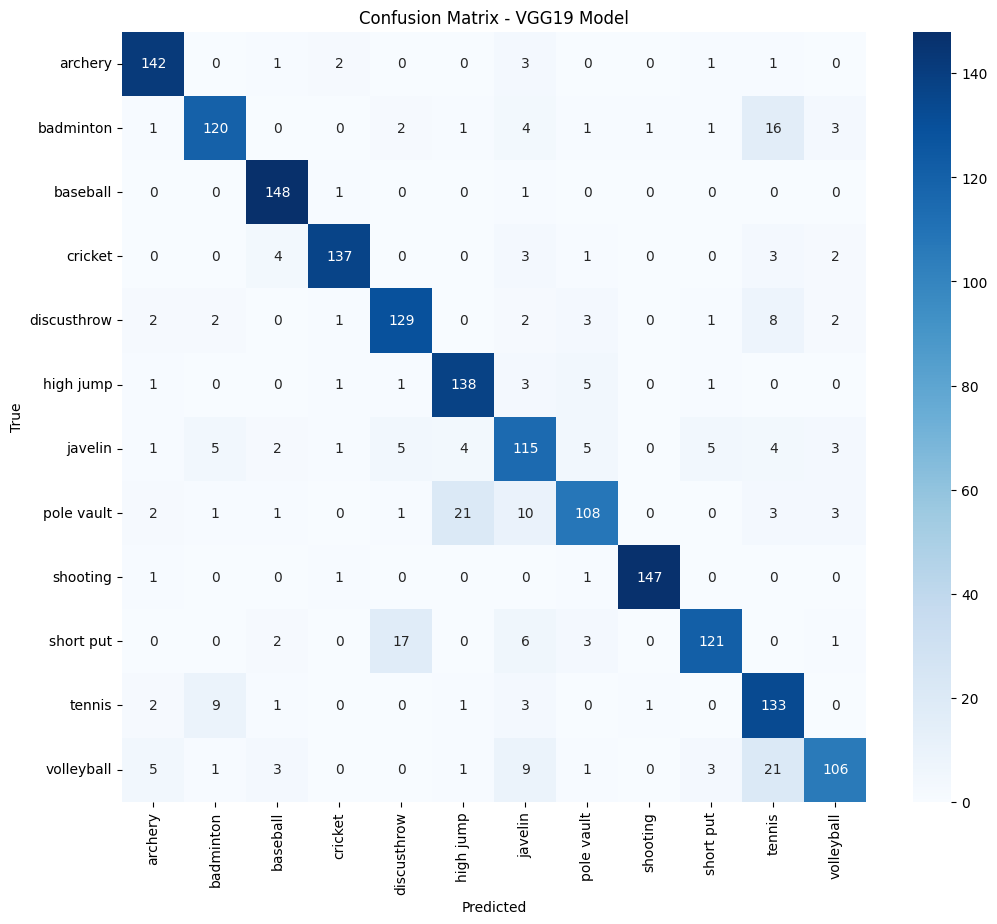

Classification Report - VGG19:
              precision    recall  f1-score   support

     archery       0.90      0.95      0.93       150
   badminton       0.87      0.80      0.83       150
    baseball       0.91      0.99      0.95       150
     cricket       0.95      0.91      0.93       150
 discusthrow       0.83      0.86      0.85       150
   high jump       0.83      0.92      0.87       150
     javelin       0.72      0.77      0.74       150
  pole vault       0.84      0.72      0.78       150
    shooting       0.99      0.98      0.98       150
   short put       0.91      0.81      0.86       150
      tennis       0.70      0.89      0.78       150
  volleyball       0.88      0.71      0.79       150

    accuracy                           0.86      1800
   macro avg       0.86      0.86      0.86      1800
weighted avg       0.86      0.86      0.86      1800



In [ ]:
# Metrics and visualization
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

class_names = ['archery', 'badminton', 'baseball', 'cricket', 'discusthrow',
               'high jump', 'javelin', 'pole vault', 'shooting',
               'short put', 'tennis', 'volleyball']

# Get predictions and true labels
y_true_vgg19 = []
y_pred_vgg19 = []

for images, labels in test_dataset:
    preds = model_vgg19.predict(images)
    y_true_vgg19.extend(tf.argmax(labels, axis=1).numpy())
    y_pred_vgg19.extend(tf.argmax(preds, axis=1).numpy())

# Confusion Matrix
conf_matrix_vgg19 = confusion_matrix(y_true_vgg19, y_pred_vgg19)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix_vgg19, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - VGG19 Model')
plt.show()

# Classification Report
print("Classification Report - VGG19:")
print(classification_report(y_true_vgg19, y_pred_vgg19, target_names=class_names))

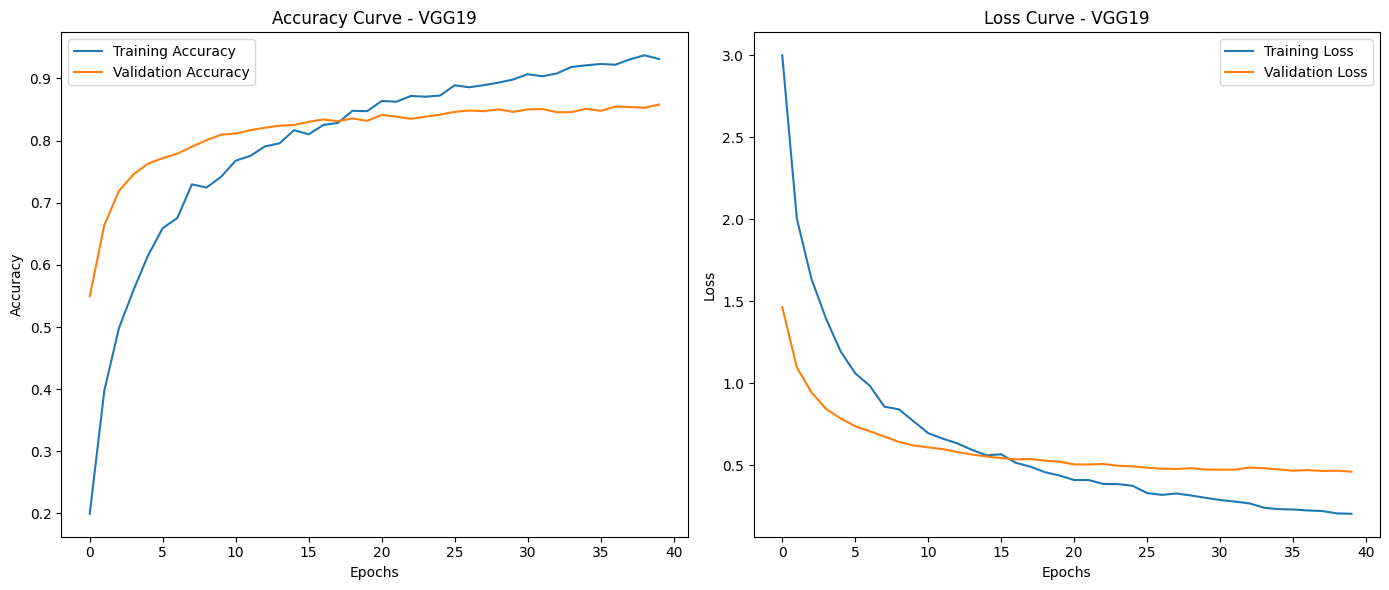

In [ ]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(14, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_vgg19.history['accuracy'], label='Training Accuracy')
plt.plot(history_vgg19.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve - VGG19')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_vgg19.history['loss'], label='Training Loss')
plt.plot(history_vgg19.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve - VGG19')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Per-Class Accuracy (VGG19):
archery: 0.95
badminton: 0.80
baseball: 0.99
cricket: 0.91
discusthrow: 0.86
high jump: 0.92
javelin: 0.77
pole vault: 0.72
shooting: 0.98
short put: 0.81
tennis: 0.89
volleyball: 0.71


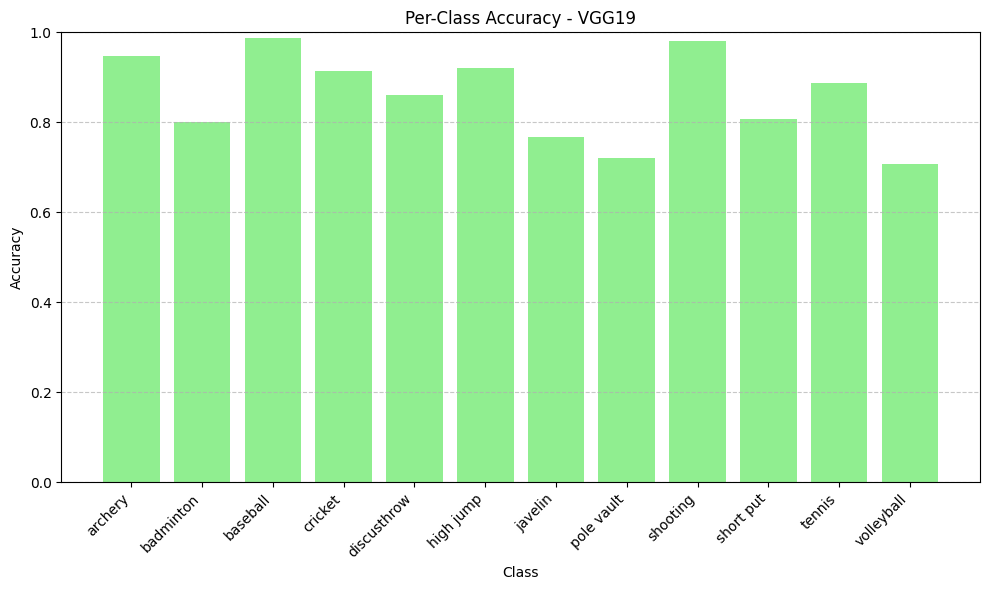

In [ ]:
# Calculate per-class accuracy
class_accuracies_vgg19 = conf_matrix_vgg19.diagonal() / conf_matrix_vgg19.sum(axis=1)

# Print per-class accuracy
print("Per-Class Accuracy (VGG19):")
for idx, class_name in enumerate(class_names):
    print(f"{class_name}: {class_accuracies_vgg19[idx]:.2f}")

# Visualize per-class accuracy using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_accuracies_vgg19, color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-Class Accuracy - VGG19')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
